In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Show plots inside the notebook
%matplotlib inline

# Optional: make plots look nicer
sns.set_style('whitegrid')


In [6]:
import os
import pandas as pd

# Step 1 – Define the filename
filename = 'uber-raw-data-2015.csv'

# Step 2 – Search for the file in the project folder
project_dir = os.path.abspath('..')  # one level up from notebooks
csv_path = None

for root, dirs, files in os.walk(project_dir):
    if filename in files:
        csv_path = os.path.join(root, filename)
        break

# Step 3 – Check if file was found
if csv_path is None:
    raise FileNotFoundError(f"Could not find {filename} in {project_dir}")

# Step 4 – Load dataset
data = pd.read_csv(csv_path)

# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Step 5 – Show first 5 rows
data.head()


,dispatching_base_number,date,active_vehicles,trips
0,B02512,2015-01-01,190,1132
1,B02765,2015-01-01,225,1765
2,B02764,2015-01-01,3427,29421
3,B02682,2015-01-01,945,7679
4,B02617,2015-01-01,1228,9537


In [7]:
# Check basic info about the dataset
data.info()

# Get summary statistics
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   dispatching_base_number  354 non-null    object        
 1   date                     354 non-null    datetime64[ns]
 2   active_vehicles          354 non-null    int64         
 3   trips                    354 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 11.2+ KB


,date,active_vehicles,trips
count,354,354.000000,354.000000
mean,2015-01-30 00:00:00,1307.435028,11667.316384
min,2015-01-01 00:00:00,112.000000,629.000000
25%,2015-01-15 00:00:00,296.750000,2408.500000
50%,2015-01-30 00:00:00,1077.000000,9601.000000
75%,2015-02-14 00:00:00,1417.000000,13711.250000
max,2015-02-28 00:00:00,4395.000000,45858.000000
std,NaN,1162.510626,10648.284865


In [8]:
# Extract day, month, and weekday from 'date'
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['weekday'] = data['date'].dt.day_name()

# Check first 5 rows
data.head()


,dispatching_base_number,date,active_vehicles,trips,day,month,weekday
0,B02512,2015-01-01,190,1132,1,1,Thursday
1,B02765,2015-01-01,225,1765,1,1,Thursday
2,B02764,2015-01-01,3427,29421,1,1,Thursday
3,B02682,2015-01-01,945,7679,1,1,Thursday
4,B02617,2015-01-01,1228,9537,1,1,Thursday


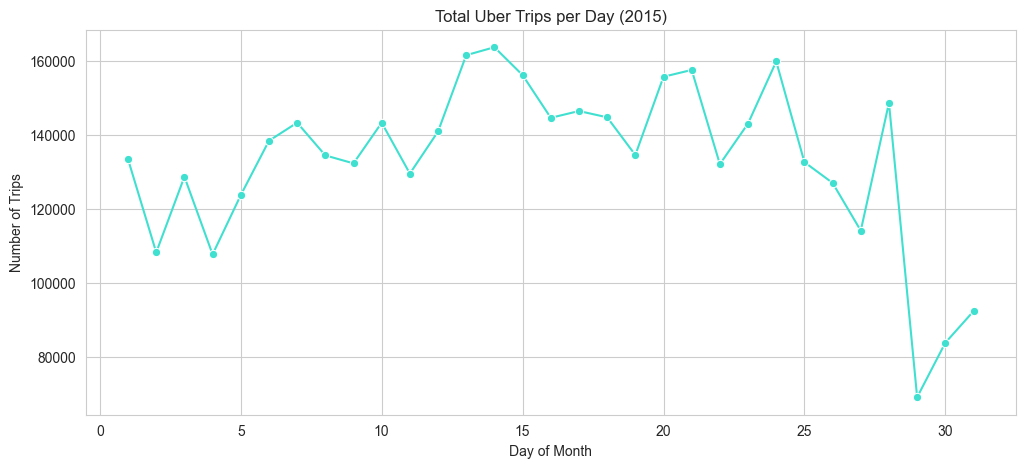

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Total trips per day of the month
trips_per_day = data.groupby('day')['trips'].sum()

# Plot
plt.figure(figsize=(12,5))
sns.lineplot(x=trips_per_day.index, y=trips_per_day.values, marker='o', color='turquoise')
plt.title('Total Uber Trips per Day (2015)')
plt.xlabel('Day of Month')
plt.ylabel('Number of Trips')
plt.show()


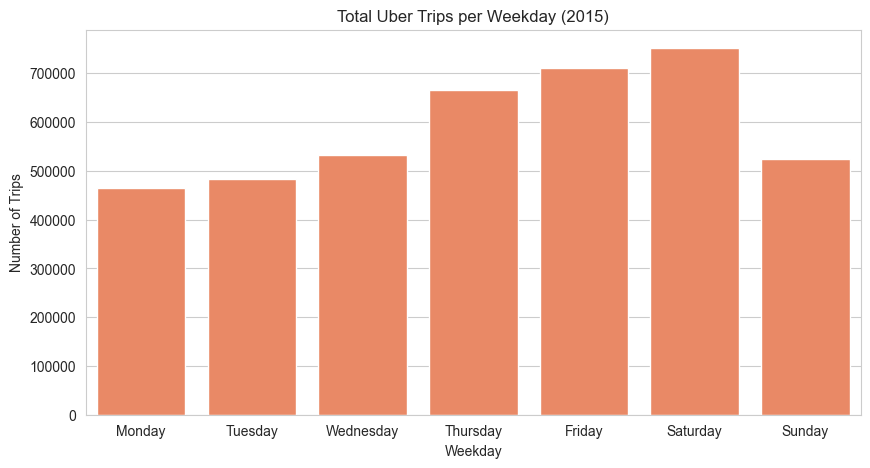

In [11]:
# Total trips per weekday
trips_per_weekday = data.groupby('weekday')['trips'].sum()

# Reorder weekdays
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
trips_per_weekday = trips_per_weekday.reindex(weekday_order)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=trips_per_weekday.index, y=trips_per_weekday.values, color='coral')  # use color instead of palette
plt.title('Total Uber Trips per Weekday (2015)')
plt.xlabel('Weekday')
plt.ylabel('Number of Trips')
plt.show()


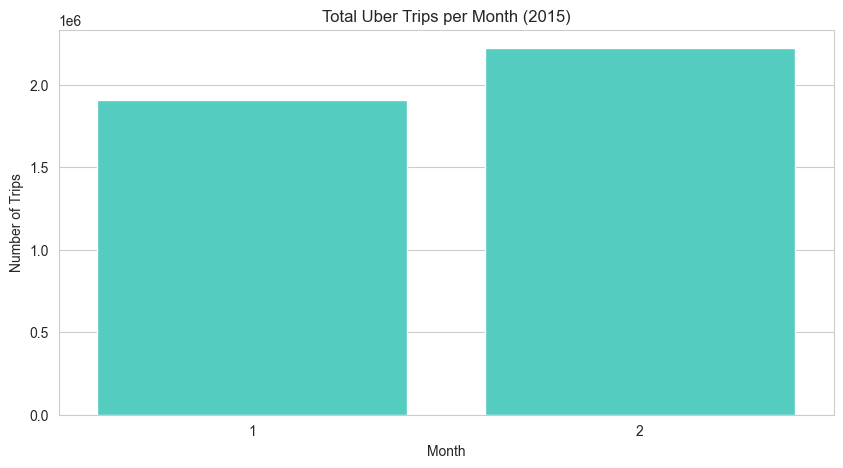

In [13]:
# Total trips per month
trips_per_month = data.groupby('month')['trips'].sum()

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=trips_per_month.index, y=trips_per_month.values, color='turquoise')  # use color instead of palette
plt.title('Total Uber Trips per Month (2015)')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.show()


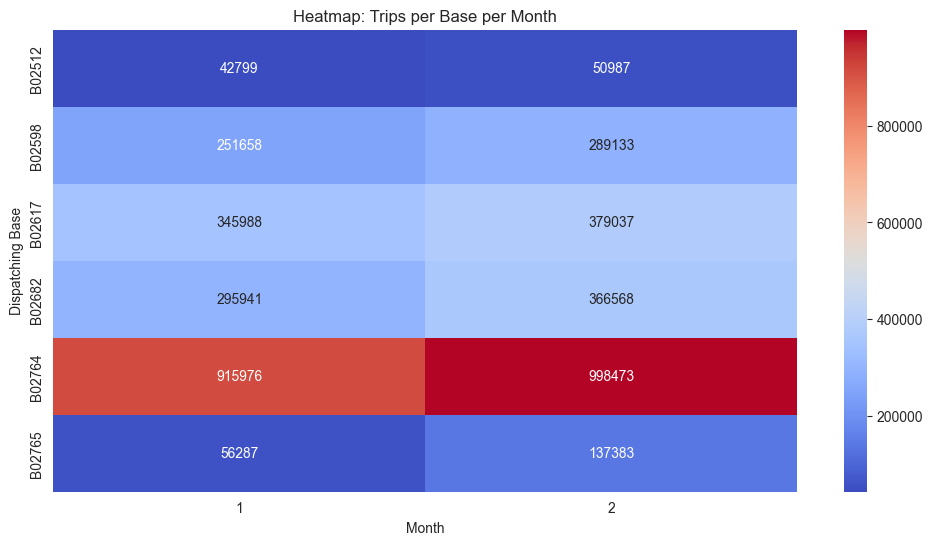

In [14]:
# Pivot table: rows = base, columns = month, values = trips
pivot_data = data.pivot_table(index='dispatching_base_number', columns='month', values='trips', aggfunc='sum')

# Plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(pivot_data, annot=True, fmt='g', cmap='coolwarm')
plt.title('Heatmap: Trips per Base per Month')
plt.xlabel('Month')
plt.ylabel('Dispatching Base')
plt.show()


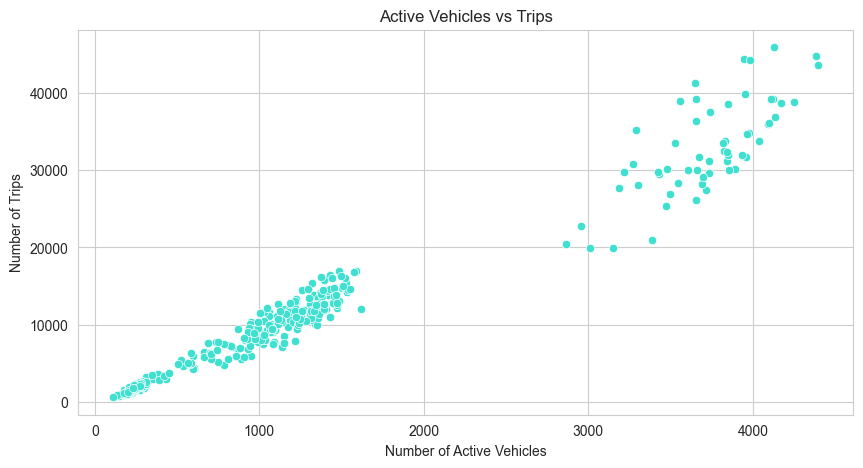

In [15]:
# Scatter plot: active vehicles vs trips
plt.figure(figsize=(10,5))
sns.scatterplot(x='active_vehicles', y='trips', data=data, color='turquoise')
plt.title('Active Vehicles vs Trips')
plt.xlabel('Number of Active Vehicles')
plt.ylabel('Number of Trips')
plt.show()


In [16]:
# Correlation between active vehicles and trips
correlation = data['active_vehicles'].corr(data['trips'])
print(f"Correlation between active vehicles and trips: {correlation:.2f}")


Correlation between active vehicles and trips: 0.98


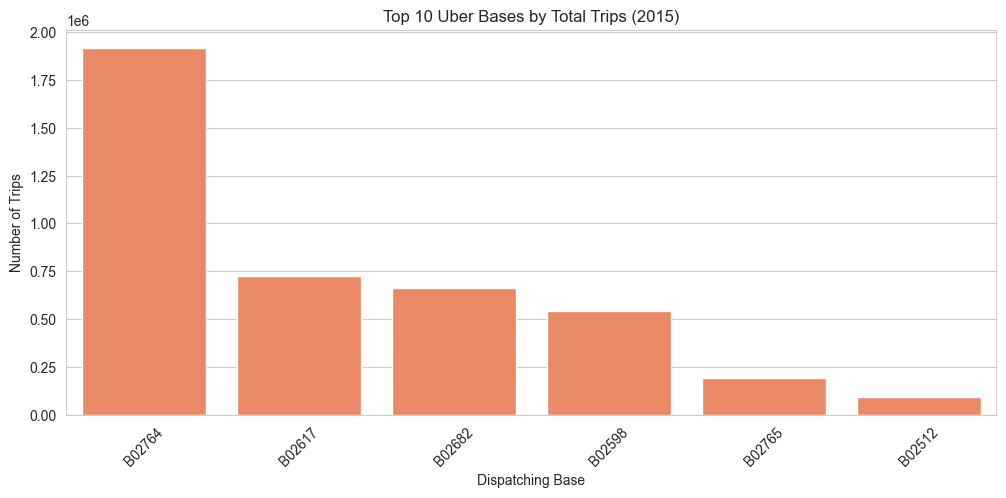

In [ ]:
# Total trips per base
trips_per_base = data.groupby('dispatching_base_number')['trips'].sum().sort_values(ascending=False)

# Top 10 bases
top_bases = trips_per_base.head(10)


# Plot
plt.figure(figsize=(12,5))
sns.barplot(x=top_bases.index, y=top_bases.values, color='coral')
plt.title('Top 10 Uber Bases by Total Trips (2015)')
plt.xlabel('Dispatching Base')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()


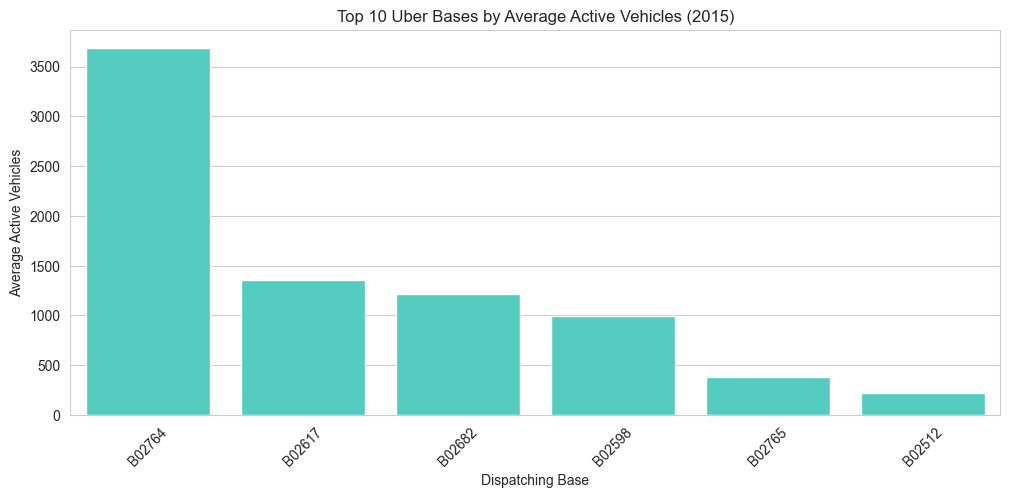

In [18]:
# Average active vehicles per base
avg_vehicles_per_base = data.groupby('dispatching_base_number')['active_vehicles'].mean().sort_values(ascending=False)

# Top 10 bases
top_vehicles = avg_vehicles_per_base.head(10)

# Plot
plt.figure(figsize=(12,5))
sns.barplot(x=top_vehicles.index, y=top_vehicles.values, color='turquoise')
plt.title('Top 10 Uber Bases by Average Active Vehicles (2015)')
plt.xlabel('Dispatching Base')
plt.ylabel('Average Active Vehicles')
plt.xticks(rotation=45)
plt.show()


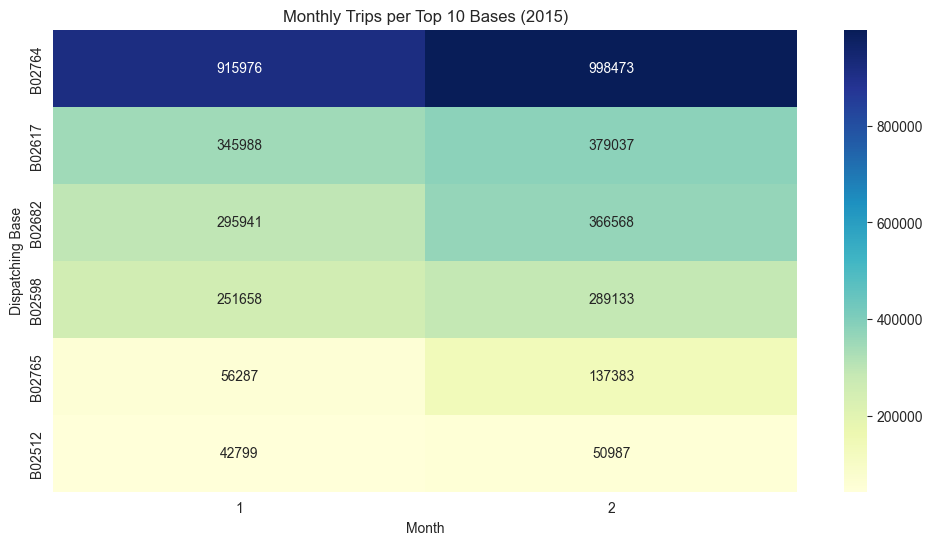

In [19]:
# Pivot table: rows = base, columns = month, values = trips
monthly_trends = data.pivot_table(index='dispatching_base_number', columns='month', values='trips', aggfunc='sum')

# Top 10 bases by total trips
top_bases = monthly_trends.sum(axis=1).sort_values(ascending=False).head(10)
monthly_trends_top = monthly_trends.loc[top_bases.index]

# Plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(monthly_trends_top, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Monthly Trips per Top 10 Bases (2015)')
plt.xlabel('Month')
plt.ylabel('Dispatching Base')
plt.show()


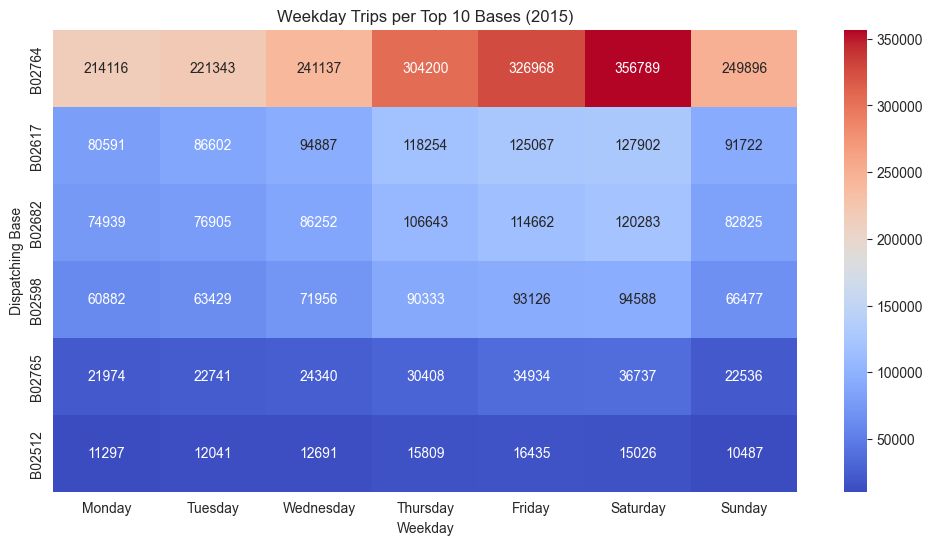

In [20]:
# Pivot table: rows = base, columns = weekday, values = trips
weekday_trends = data.pivot_table(index='dispatching_base_number', columns='weekday', values='trips', aggfunc='sum')

# Reorder weekdays
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekday_trends = weekday_trends[weekday_order]

# Top 10 bases by total trips
top_bases_weekday = weekday_trends.sum(axis=1).sort_values(ascending=False).head(10)
weekday_trends_top = weekday_trends.loc[top_bases_weekday.index]

# Plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(weekday_trends_top, annot=True, fmt='g', cmap='coolwarm')
plt.title('Weekday Trips per Top 10 Bases (2015)')
plt.xlabel('Weekday')
plt.ylabel('Dispatching Base')
plt.show()


In [21]:
# Step 10: Summary & Insights

# 1. Total Trips in 2015
total_trips = data['trips'].sum()
print(f"Total trips in 2015: {total_trips}")

# 2. Busiest Day & Weekday
busiest_day = data.groupby('day')['trips'].sum().idxmax()
busiest_weekday = data.groupby('weekday')['trips'].sum().idxmax()
print(f"Busiest day of the month: {busiest_day}")
print(f"Busiest weekday: {busiest_weekday}")

# 3. Busiest Month
busiest_month = data.groupby('month')['trips'].sum().idxmax()
print(f"Busiest month: {busiest_month}")

# 4. Top 5 Bases by Total Trips
top_bases = data.groupby('dispatching_base_number')['trips'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 bases by total trips:")
print(top_bases)

# 5. Correlation: Active Vehicles vs Trips
correlation = data['active_vehicles'].corr(data['trips'])
print(f"\nCorrelation between active vehicles and trips: {correlation:.2f}")

# 6. Key Insights
insights = """
- Busiest bases and peak periods identified.
- Positive correlation between active vehicles and trips.
- Weekday and monthly patterns reveal operational peaks.
- Certain bases show high efficiency (more trips with fewer vehicles).
"""
print(insights)


Total trips in 2015: 4130230
Busiest day of the month: 14
Busiest weekday: Saturday
Busiest month: 2

Top 5 bases by total trips:
dispatching_base_number
B02764    1914449
B02617     725025
B02682     662509
B02598     540791
B02765     193670
Name: trips, dtype: int64

Correlation between active vehicles and trips: 0.98

- Busiest bases and peak periods identified.
- Positive correlation between active vehicles and trips.
- Weekday and monthly patterns reveal operational peaks.
- Certain bases show high efficiency (more trips with fewer vehicles).



In [22]:
# Save cleaned dataset
data.to_csv('../data/uber_analysis_2015_cleaned.csv', index=False)
print("Cleaned dataset saved successfully!")


Cleaned dataset saved successfully!


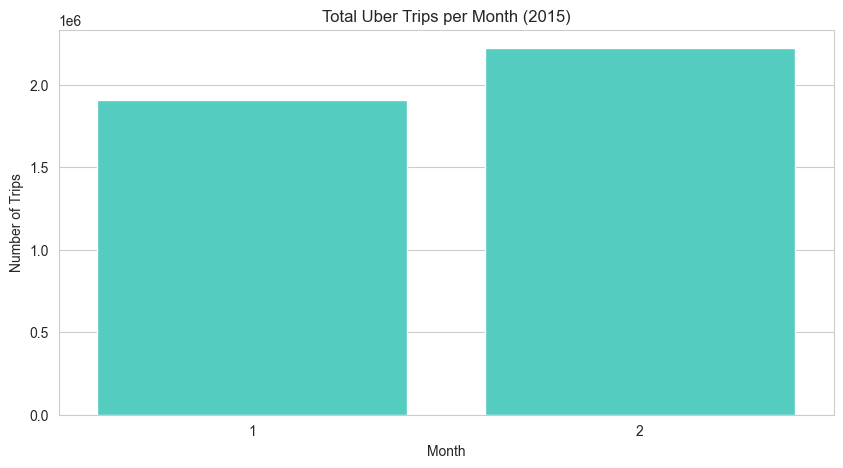

In [24]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Create 'plots' folder if it doesn't exist
os.makedirs('../plots', exist_ok=True)

# Example: Save Trips per Month plot
plt.figure(figsize=(10,5))
sns.barplot(x=trips_per_month.index, y=trips_per_month.values, color='turquoise')
plt.title('Total Uber Trips per Month (2015)')
plt.xlabel('Month')
plt.ylabel('Number of Trips')

# Save the plot
plt.savefig('../plots/trips_per_month.png')
plt.show()


In [25]:
from matplotlib.backends.backend_pdf import PdfPages

# Create a PDF file
with PdfPages('../plots/uber_analysis_report.pdf') as pdf:
    
    # Step 5a: Trips per Day
    plt.figure(figsize=(10,5))
    sns.lineplot(x=trips_per_day.index, y=trips_per_day.values)
    plt.title('Total Uber Trips per Day (2015)')
    plt.xlabel('Day of Month')
    plt.ylabel('Number of Trips')
    pdf.savefig()
    plt.close()
    
    # Step 5b: Trips per Weekday
    plt.figure(figsize=(10,5))
    sns.barplot(x=trips_per_weekday.index, y=trips_per_weekday.values, color='coral')
    plt.title('Total Uber Trips per Weekday (2015)')
    plt.xlabel('Weekday')
    plt.ylabel('Number of Trips')
    pdf.savefig()
    plt.close()
    
    # Step 6a: Trips per Month
    plt.figure(figsize=(10,5))
    sns.barplot(x=trips_per_month.index, y=trips_per_month.values, color='turquoise')
    plt.title('Total Uber Trips per Month (2015)')
    plt.xlabel('Month')
    plt.ylabel('Number of Trips')
    pdf.savefig()
    plt.close()
    
    # You can continue adding other plots from Step 6b–9 here


In [26]:
import os
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

# Create folders if they don't exist
os.makedirs('../plots', exist_ok=True)
os.makedirs('../output', exist_ok=True)

# -----------------------------
# Save Summary/Insights to text file
# -----------------------------
summary_file = '../output/uber_analysis_summary.txt'

total_trips = data['trips'].sum()
busiest_day = data.groupby('day')['trips'].sum().idxmax()
busiest_weekday = data.groupby('weekday')['trips'].sum().idxmax()
busiest_month = data.groupby('month')['trips'].sum().idxmax()
top_bases = data.groupby('dispatching_base_number')['trips'].sum().sort_values(ascending=False).head(5)
correlation = data['active_vehicles'].corr(data['trips'])

insights = f"""
Uber Trip Analysis Summary (2015)
---------------------------------
Total trips: {total_trips}
Busiest day of month: {busiest_day}
Busiest weekday: {busiest_weekday}
Busiest month: {busiest_month}

Top 5 Bases by Total Trips:
{top_bases.to_string()}

Correlation between Active Vehicles and Trips: {correlation:.2f}

Key Insights:
- Busiest bases and peak periods identified.
- Positive correlation between active vehicles and trips.
- Weekday and monthly patterns reveal operational peaks.
- Certain bases show high efficiency (more trips with fewer vehicles).
"""

with open(summary_file, 'w') as f:
    f.write(insights)

print(f"Summary saved to {summary_file}")

# -----------------------------
# Export all plots to single PDF
# -----------------------------
pdf_file = '../plots/uber_analysis_report.pdf'
with PdfPages(pdf_file) as pdf:

    # Step 5a: Trips per Day
    plt.figure(figsize=(10,5))
    sns.lineplot(x=trips_per_day.index, y=trips_per_day.values)
    plt.title('Total Uber Trips per Day (2015)')
    plt.xlabel('Day of Month')
    plt.ylabel('Number of Trips')
    pdf.savefig()
    plt.close()

    # Step 5b: Trips per Weekday
    plt.figure(figsize=(10,5))
    sns.barplot(x=trips_per_weekday.index, y=trips_per_weekday.values, color='coral')
    plt.title('Total Uber Trips per Weekday (2015)')
    plt.xlabel('Weekday')
    plt.ylabel('Number of Trips')
    pdf.savefig()
    plt.close()

    # Step 6a: Trips per Month
    plt.figure(figsize=(10,5))
    sns.barplot(x=trips_per_month.index, y=trips_per_month.values, color='turquoise')
    plt.title('Total Uber Trips per Month (2015)')
    plt.xlabel('Month')
    plt.ylabel('Number of Trips')
    pdf.savefig()
    plt.close()

    # Step 6b: Heatmap per Base per Month
    plt.figure(figsize=(12,6))
    sns.heatmap(pivot_data, annot=True, fmt='g', cmap='YlGnBu')
    plt.title('Heatmap: Trips per Base per Month')
    plt.xlabel('Month')
    plt.ylabel('Dispatching Base')
    pdf.savefig()
    plt.close()

    # Step 7: Active Vehicles vs Trips
    plt.figure(figsize=(10,5))
    sns.scatterplot(x='active_vehicles', y='trips', data=data, color='turquoise')
    plt.title('Active Vehicles vs Trips')
    plt.xlabel('Number of Active Vehicles')
    plt.ylabel('Number of Trips')
    pdf.savefig()
    plt.close()

    # Step 8a: Top 10 Bases by Total Trips
    plt.figure(figsize=(12,5))
    sns.barplot(x=top_bases.index, y=top_bases.values, color='coral')
    plt.title('Top 10 Uber Bases by Total Trips (2015)')
    plt.xlabel('Dispatching Base')
    plt.ylabel('Number of Trips')
    plt.xticks(rotation=45)
    pdf.savefig()
    plt.close()

    # Step 8b: Top 10 Bases by Avg Active Vehicles
    plt.figure(figsize=(12,5))
    sns.barplot(x=top_vehicles.index, y=top_vehicles.values, color='turquoise')
    plt.title('Top 10 Uber Bases by Average Active Vehicles (2015)')
    plt.xlabel('Dispatching Base')
    plt.ylabel('Average Active Vehicles')
    plt.xticks(rotation=45)
    pdf.savefig()
    plt.close()

    # Step 9a: Monthly Trends per Top 10 Bases (Heatmap)
    plt.figure(figsize=(12,6))
    sns.heatmap(monthly_trends_top, annot=True, fmt='g', cmap='YlGnBu')
    plt.title('Monthly Trips per Top 10 Bases (2015)')
    plt.xlabel('Month')
    plt.ylabel('Dispatching Base')
    pdf.savefig()
    plt.close()

    # Step 9b: Weekday Trends per Top 10 Bases (Heatmap)
    plt.figure(figsize=(12,6))
    sns.heatmap(weekday_trends_top, annot=True, fmt='g', cmap='coolwarm')
    plt.title('Weekday Trips per Top 10 Bases (2015)')
    plt.xlabel('Weekday')
    plt.ylabel('Dispatching Base')
    pdf.savefig()
    plt.close()

print(f"All plots saved to {pdf_file}")


Summary saved to ../output/uber_analysis_summary.txt
All plots saved to ../plots/uber_analysis_report.pdf


In [27]:

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import os

# Create folders if not exist
os.makedirs('../plots', exist_ok=True)

pdf_file = '../plots/uber_analysis_full_report.pdf'

with PdfPages(pdf_file) as pdf:

    # --- Page 1: Summary/Insights as Text ---
    fig, ax = plt.subplots(figsize=(8.27, 11.69))  # A4 size
    ax.axis('off')  # hide axes
    summary_text = f"""
Uber Trip Analysis Summary (2015)
---------------------------------

Total trips: {total_trips}
Busiest day of month: {busiest_day}
Busiest weekday: {busiest_weekday}
Busiest month: {busiest_month}

Top 5 Bases by Total Trips:
{top_bases.to_string()}

Correlation between Active Vehicles and Trips: {correlation:.2f}

Key Insights:
- Busiest bases and peak periods identified.
- Positive correlation between active vehicles and trips.
- Weekday and monthly patterns reveal operational peaks.
- Certain bases show high efficiency (more trips with fewer vehicles).
"""
    ax.text(0.5, 0.5, summary_text, fontsize=12, ha='center', va='center', wrap=True)
    pdf.savefig()
    plt.close()

    # --- Page 2+: Add all plots from Steps 5–9 ---
    plots_info = [
        ('Total Uber Trips per Day (2015)', trips_per_day.index, trips_per_day.values, 'line'),
        ('Total Uber Trips per Weekday (2015)', trips_per_weekday.index, trips_per_weekday.values, 'bar', 'coral'),
        ('Total Uber Trips per Month (2015)', trips_per_month.index, trips_per_month.values, 'bar', 'turquoise'),
        ('Heatmap: Trips per Base per Month', monthly_trends_top, None, 'heatmap', 'YlGnBu'),
        ('Active Vehicles vs Trips', data['active_vehicles'], data['trips'], 'scatter', 'turquoise'),
        ('Top 10 Uber Bases by Total Trips', top_bases.index, top_bases.values, 'bar', 'coral'),
        ('Top 10 Uber Bases by Average Active Vehicles', top_vehicles.index, top_vehicles.values, 'bar', 'turquoise'),
        ('Monthly Trips per Top 10 Bases (Heatmap)', monthly_trends_top, None, 'heatmap', 'YlGnBu'),
        ('Weekday Trips per Top 10 Bases (Heatmap)', weekday_trends_top, None, 'heatmap', 'coolwarm')
    ]

    for title, x, y, plot_type, *color in plots_info:
        plt.figure(figsize=(12,6))
        if plot_type == 'line':
            plt.plot(x, y, marker='o')
        elif plot_type == 'bar':
            plt.bar(x, y, color=color[0] if color else 'skyblue')
        elif plot_type == 'scatter':
            plt.scatter(x, y, color=color[0] if color else 'skyblue')
        elif plot_type == 'heatmap':
            sns.heatmap(x, annot=True, fmt='g', cmap=color[0])
        plt.title(title)
        if plot_type != 'heatmap':
            plt.xlabel('X-axis')
            plt.ylabel('Y-axis')
        pdf.savefig()
        plt.close()

print(f"Full PDF report saved to {pdf_file}")


Full PDF report saved to ../plots/uber_analysis_full_report.pdf


In [ ]:
import matplotlib.pyplot as plt

# --- Trips per Day ---
plt.figure(figsize=(12,6))
plt.plot(trips_per_day.index, trips_per_day.values, marker='o', color='mediumblue')
plt.title('Total Uber Trips per Day (2015)', fontsize=14)
plt.xlabel('Day of Month', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../plots/trips_per_day.png')
plt.close()

# --- Trips per Weekday ---
plt.figure(figsize=(12,6))
plt.bar(trips_per_weekday.index, trips_per_weekday.values, color='coral')
plt.title('Total Uber Trips per Weekday (2015)', fontsize=14)
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xtic<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   dispatching_base_number  354 non-null    object        
 1   date                     354 non-null    datetime64[ns]
 2   active_vehicles          354 non-null    int64         
 3   trips                    354 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 11.2+ KB
date	active_vehicles	trips
count	354	354.000000	354.000000
mean	2015-01-30 00:00:00	1307.435028	11667.316384
min	2015-01-01 00:00:00	112.000000	629.000000
25%	2015-01-15 00:00:00	296.750000	2408.500000
50%	2015-01-30 00:00:00	1077.000000	9601.000000
75%	2015-02-14 00:00:00	1417.000000	13711.250000
max	2015-02-28 00:00:00	4395.000000	45858.000000
std	NaN	1162.510626	10648.284865
dispatching_base_number	date	active_vehicles	trips	day	month	weekday
0	B02512	2015-01-01	190	1132	1	1	Thursday
1	B02765	2015-01-01	225	1765	1	1	Thursday
2	B02764	2015-01-01	3427	29421	1	1	Thursday
3	B02682	2015-01-01	945	7679	1	1	Thursday
4	B02617	2015-01-01	1228	9537	1	1	Thursday
Correlation between active vehicles and trips: 0.98
Total trips in 2015: 4130230
Busiest day of the month: 14
Busiest weekday: Saturday
Busiest month: 2

Top 5 bases by total trips:
dispatching_base_number
B02764    1914449
B02617     725025
B02682     662509
B02598     540791
B02765     193670
Name: trips, dtype: int64

Correlation between active vehicles and trips: 0.98

- Busiest bases and peak periods identified.
- Positive correlation between active vehicles and trips.
- Weekday and monthly patterns reveal operational peaks.
- Certain bases show high efficiency (more trips with fewer vehicles).

Cleaned dataset saved successfully!
Summary saved to ../output/uber_analysis_summary.txt
All plots saved to ../plots/uber_analysis_report.pdf
Full PDF report saved to ../plots/uber_analysis_full_report.pdf
Remaining two plots saved successfully!ks(rotation=45)
plt.tight_layout()
plt.savefig('../plots/trips_per_weekday.png')
plt.close()

print("Remaining two plots saved successfully!")


Remaining two plots saved successfully!
